In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime, timedelta
import re

### Data Analysis

In [2]:
# convert csv data into dataframe
df = pd.read_csv('reddit_comments.csv')
df.head()

,author,id,submission,body,subreddit,created_utc,collected_utc
0,gingerandlemonjuice,kafu2as,1820u7i,"Honestly, it’s November and the sun is shining...",AskUK,2023-11-23T14:07:58,2023-11-23T14:08:11.093177
1,DJFiscallySound,kafu2d3,1821rnk,And / or buy cheapest flights possible that at...,AskUK,2023-11-23T14:07:59,2023-11-23T14:08:11.096299
2,DangerShart,kafu2jo,1821n6e,I'd be amazed if all of that went to the serve...,AskUK,2023-11-23T14:08:01,2023-11-23T14:08:12.851166
3,massiveheadsmalltabs,kafu2mp,181zcga,Toy Story 3 was pretty big. only time i had to...,AskUK,2023-11-23T14:08:02,2023-11-23T14:08:14.575502
4,Say10sadvocate,kafu33v,181wmzf,"I just leave stuff on my drive, it disappears ...",AskUK,2023-11-23T14:08:09,2023-11-23T14:08:23.437888


In [3]:
# create new column that is the datatime of the created_utc
df['created_timestamp'] = pd.to_datetime(df['created_utc'])

# set this new column to the index
df.set_index('created_timestamp', inplace=True)
df.head()

,author,id,submission,body,subreddit,created_utc,collected_utc
created_timestamp,,,,,,,
2023-11-23 14:07:58,gingerandlemonjuice,kafu2as,1820u7i,"Honestly, it’s November and the sun is shining...",AskUK,2023-11-23T14:07:58,2023-11-23T14:08:11.093177
2023-11-23 14:07:59,DJFiscallySound,kafu2d3,1821rnk,And / or buy cheapest flights possible that at...,AskUK,2023-11-23T14:07:59,2023-11-23T14:08:11.096299
2023-11-23 14:08:01,DangerShart,kafu2jo,1821n6e,I'd be amazed if all of that went to the serve...,AskUK,2023-11-23T14:08:01,2023-11-23T14:08:12.851166
2023-11-23 14:08:02,massiveheadsmalltabs,kafu2mp,181zcga,Toy Story 3 was pretty big. only time i had to...,AskUK,2023-11-23T14:08:02,2023-11-23T14:08:14.575502
2023-11-23 14:08:09,Say10sadvocate,kafu33v,181wmzf,"I just leave stuff on my drive, it disappears ...",AskUK,2023-11-23T14:08:09,2023-11-23T14:08:23.437888


In [4]:
# create a column of the calculations of number of words in the comments
df['number_of_words'] = [len(re.findall(r"\b\w+'\w+\b|\w+", text)) for text in df['body']]
df.head()

,author,id,submission,body,subreddit,created_utc,collected_utc,number_of_words
created_timestamp,,,,,,,,
2023-11-23 14:07:58,gingerandlemonjuice,kafu2as,1820u7i,"Honestly, it’s November and the sun is shining...",AskUK,2023-11-23T14:07:58,2023-11-23T14:08:11.093177,44
2023-11-23 14:07:59,DJFiscallySound,kafu2d3,1821rnk,And / or buy cheapest flights possible that at...,AskUK,2023-11-23T14:07:59,2023-11-23T14:08:11.096299,12
2023-11-23 14:08:01,DangerShart,kafu2jo,1821n6e,I'd be amazed if all of that went to the serve...,AskUK,2023-11-23T14:08:01,2023-11-23T14:08:12.851166,17
2023-11-23 14:08:02,massiveheadsmalltabs,kafu2mp,181zcga,Toy Story 3 was pretty big. only time i had to...,AskUK,2023-11-23T14:08:02,2023-11-23T14:08:14.575502,21
2023-11-23 14:08:09,Say10sadvocate,kafu33v,181wmzf,"I just leave stuff on my drive, it disappears ...",AskUK,2023-11-23T14:08:09,2023-11-23T14:08:23.437888,32


#### Number of unique users in each subreddit using a tumbling window

In [5]:
# create a pivot table of number of unique users (authors) in each subreddit
pivot = pd.pivot_table(
    df, 
    values='author', 
    index=df.index,
    columns=['subreddit'], 
    aggfunc='count'
)

# resample the table for 20min intervals
tumbling = pivot.resample('20min', offset='7min58sec').sum()
tumbling

subreddit,AskAnAmerican,AskUK
created_timestamp,,
2023-11-23 14:07:58,44.0,239.0
2023-11-23 14:27:58,40.0,237.0
2023-11-23 14:47:58,65.0,218.0
2023-11-23 15:07:58,43.0,212.0
2023-11-23 15:27:58,43.0,124.0
2023-11-23 15:47:58,48.0,163.0
2023-11-23 16:07:58,54.0,162.0
2023-11-23 16:27:58,49.0,190.0
2023-11-23 16:47:58,50.0,185.0


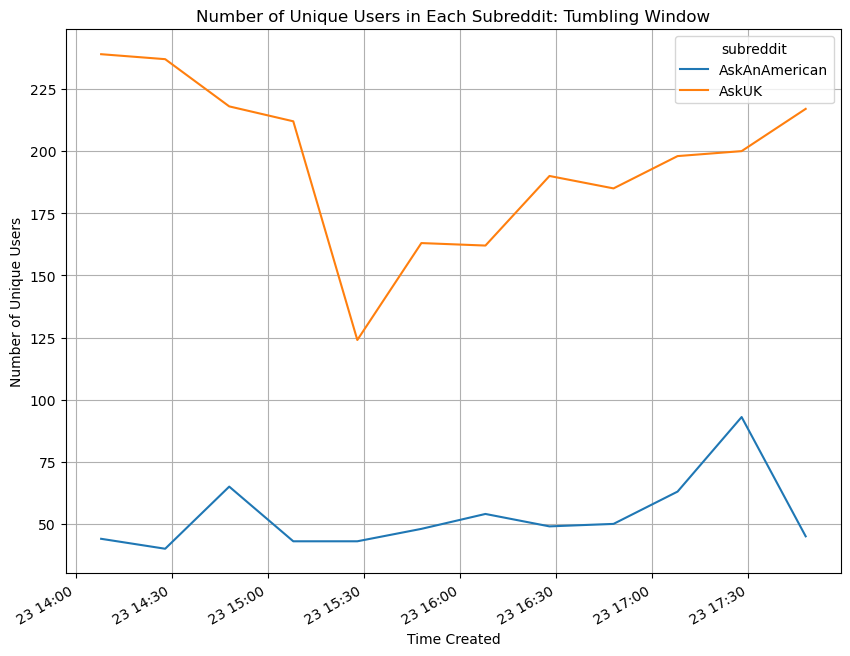

In [6]:
# plot line graph of the tumbling window 
tumbling.plot(kind='line', figsize=(10,8))
plt.title('Number of Unique Users in Each Subreddit: Tumbling Window')
plt.xlabel('Time Created')
plt.ylabel('Number of Unique Users')
plt.grid()
plt.show()


#### Number of unique users in each subreddit using a hopping window

In [7]:
# create pivot table of number of unique users (authors) in each subreddit
pivot = pd.pivot_table(
    df, 
    values='author', 
    index=df.index,
    columns=['subreddit'], 
    aggfunc='count'
)

# create 20min windows with hopping size of 5min using Fixed Forward Window Indexer
window = pivot.resample('5min', offset='7min58sec').sum()
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=4)
hopping = window.rolling(window=indexer).sum()
hopping

subreddit,AskAnAmerican,AskUK
created_timestamp,,
2023-11-23 14:07:58,44.0,239.0
2023-11-23 14:12:58,50.0,240.0
2023-11-23 14:17:58,49.0,251.0
2023-11-23 14:22:58,41.0,236.0
2023-11-23 14:27:58,40.0,237.0
2023-11-23 14:32:58,40.0,228.0
2023-11-23 14:37:58,55.0,226.0
2023-11-23 14:42:58,65.0,227.0
2023-11-23 14:47:58,65.0,218.0


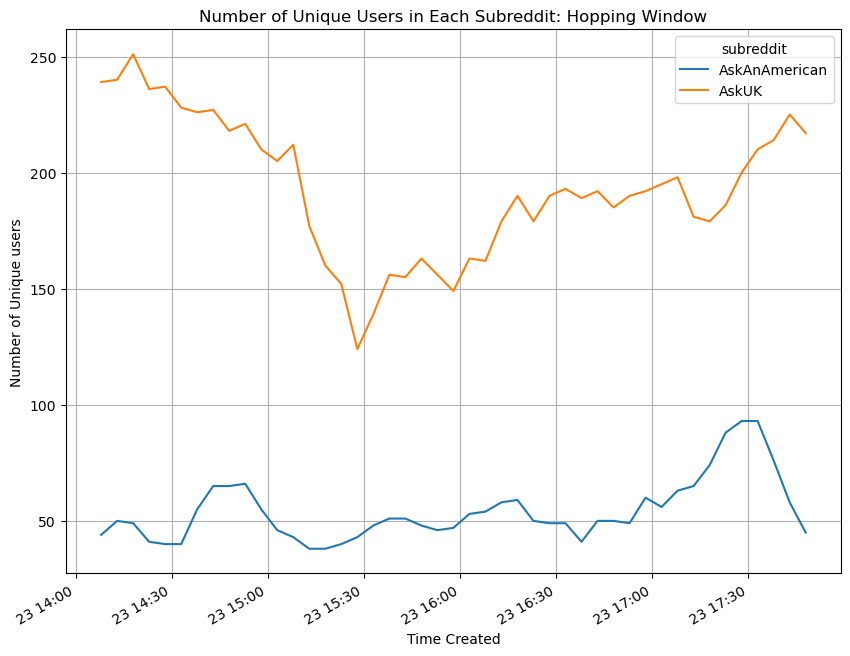

In [8]:
# plot line graph of hopping window
hopping.plot(kind='line', figsize=(10,8))
plt.title('Number of Unique Users in Each Subreddit: Hopping Window')
plt.xlabel('Time Created')
plt.ylabel('Number of Unique users')
plt.grid()
plt.show()

Firstly, both the tumbling and the hopping window of the unique number of users in each subreddit, clearly shows that AskUK has more unique users (roughly 5 times more). Secondly, AskAnAmerican appeared to show way less fluctuation in the tumbling window than the hopping window. This could potentially suggest that the user activity in AskAnAmerican has shorter bursts of high activity that aren't as well captured in the tumbling window because of the restricted intervals. Finally, and similarly, AskUK shows a smoother trend in the hopping window over the tumbling window. This discrepency between the smoothness in each window plot, however, is less of a discrepency for AskAnAmerican. This suggests that the activity on AskUK might be more evenly distributed over time.


#### Average number of words per comment for each subreddit using a tumbling window 

In [9]:
cpivot = pd.pivot_table(
    df, 
    values='number_of_words', 
    index=df.index,
    columns=['subreddit'], 
    aggfunc='mean'
)

# resample the table for 20min intervals
tumbling = pivot.resample('20min', offset='7min58sec').mean()
tumbling

subreddit,AskAnAmerican,AskUK
created_timestamp,,
2023-11-23 14:07:58,1.023256,1.096330
2023-11-23 14:27:58,1.052632,1.072398
2023-11-23 14:47:58,1.065574,1.090000
2023-11-23 15:07:58,1.000000,1.076142
2023-11-23 15:27:58,1.048780,1.042017
2023-11-23 15:47:58,1.021277,1.086667
2023-11-23 16:07:58,1.000000,1.072848
2023-11-23 16:27:58,1.042553,1.067416
2023-11-23 16:47:58,1.020408,1.051136


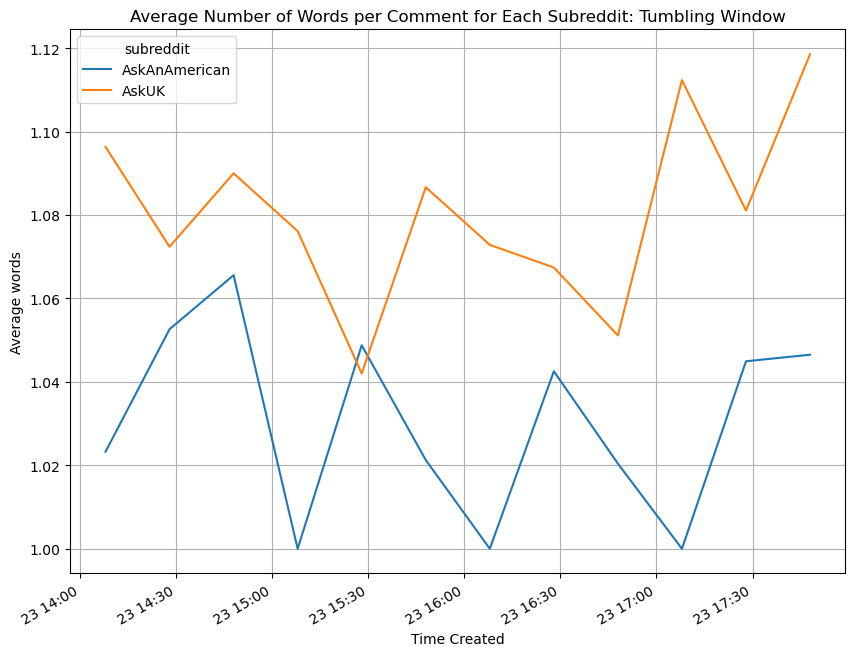

In [10]:
# plot line graph of tumbling window
tumbling.plot(kind='line', figsize=(10, 8))
plt.xlabel('Time Created')
plt.ylabel('Average words')
plt.title('Average Number of Words per Comment for Each Subreddit: Tumbling Window')
plt.grid()
plt.show()

#### Average number of words per comment for each subreddit using a hopping window 

In [11]:
# create pivot table of average number of words per comment in each subreddit
pivot = pd.pivot_table(
    df, 
    values='number_of_words', 
    index=df.index,
    columns=['subreddit'], 
    aggfunc='mean'
)

# create 20min windows with hopping size of 5min using Fixed Forward Window Indexer
window = pivot.resample('5min', offset='7min58sec').mean()
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=4)
hopping = window.rolling(window=indexer).mean()
hopping

subreddit,AskAnAmerican,AskUK
created_timestamp,,
2023-11-23 14:07:58,44.308585,35.330288
2023-11-23 14:12:58,37.409776,37.874643
2023-11-23 14:17:58,31.753526,39.456488
2023-11-23 14:22:58,24.453526,39.694157
2023-11-23 14:27:58,29.174679,39.349127
2023-11-23 14:32:58,24.830929,40.074539
2023-11-23 14:37:58,25.619620,39.380946
2023-11-23 14:42:58,31.391842,38.792857
2023-11-23 14:47:58,31.237996,40.093478


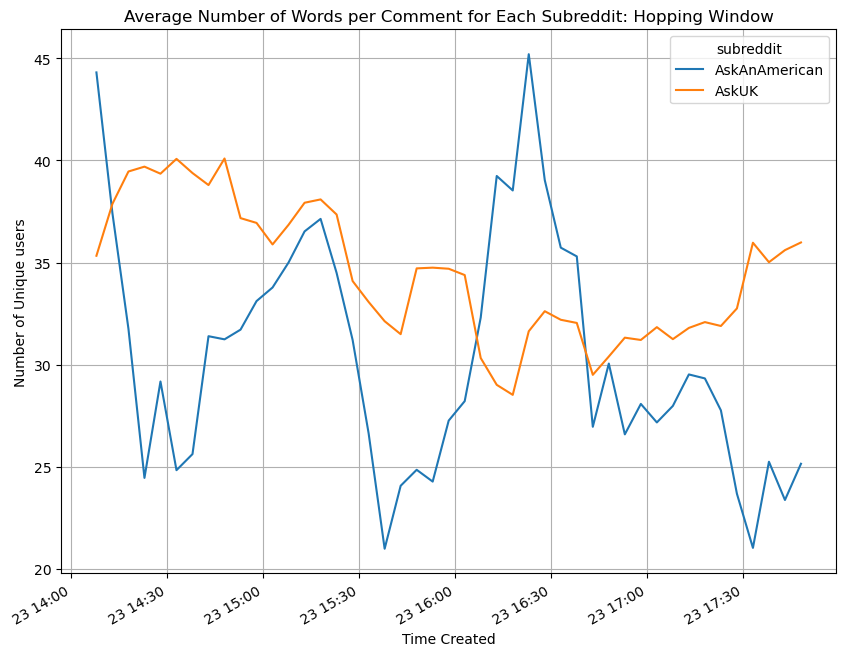

In [13]:
# plot line graph of hopping window
hopping.plot(kind='line', figsize=(10, 8))
plt.xlabel('Time Created')
plt.ylabel('Number of Unique users')
plt.title('Average Number of Words per Comment for Each Subreddit: Hopping Window')
plt.grid()
plt.show()

Firstly, the tumbling window has more volatility with sharper increases and decreases in the average word count, because of the fact that each interval is calculated independently. This contrasts with the hopping window which smooths out these fluctuation because it includes average words of comments from previous windows. Secondly, trends in average word count might be easier to spot in the hopping window, while the tumbling window is more indicative of immediate fluctuations. In terms of the differences between the subreddits, it is clear that AskAnAmerican is a lot more volatile with larger fluctuations, while AskUK is more consistent.

